<a href="https://colab.research.google.com/github/your-lithium/projector-project/blob/main/notebooks/interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
import lightgbm as lgb

In [ ]:
!pip install shap

# data and model

In [ ]:
lgb_model = lgb.Booster(model_file='/content/model.txt')

In [ ]:
final_features = ['mark', 'model', 'year', 'equipment', 'mileage', 'place',
                  'description', 'accident', 'mean_price', 'engine_power']

In [ ]:
data = pd.read_csv('/content/data.csv', index_col=0)

In [ ]:
bin_count = 30
bin_numbers = pd.qcut(
    x=data['price'], q=bin_count, labels=False, duplicates='drop'
)

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(data[final_features], data['price'], test_size=0.2, random_state=42, stratify=bin_numbers)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

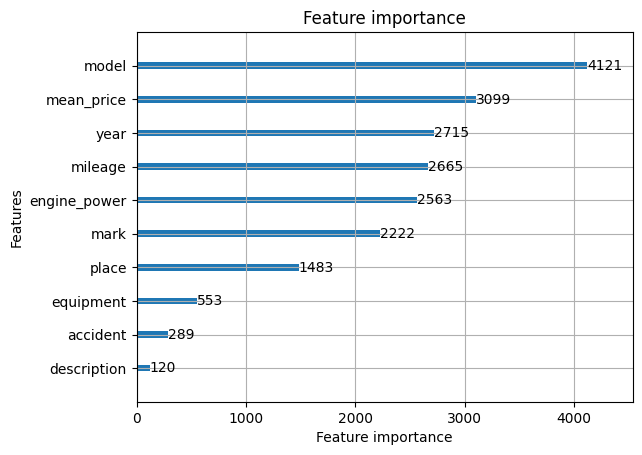

In [ ]:
lgb.plot_importance(lgb_model)

## shap

In [ ]:
import shap

explainer = shap.TreeExplainer(lgb_model, model_output="raw", feature_perturbation="tree_path_dependent")

In [ ]:
shap.initjs()
subsampled_data = train_features[final_features].sample(n=2000, random_state=42)

shap_values = explainer.shap_values(subsampled_data)
shap.force_plot(explainer.expected_value, shap_values, subsampled_data)

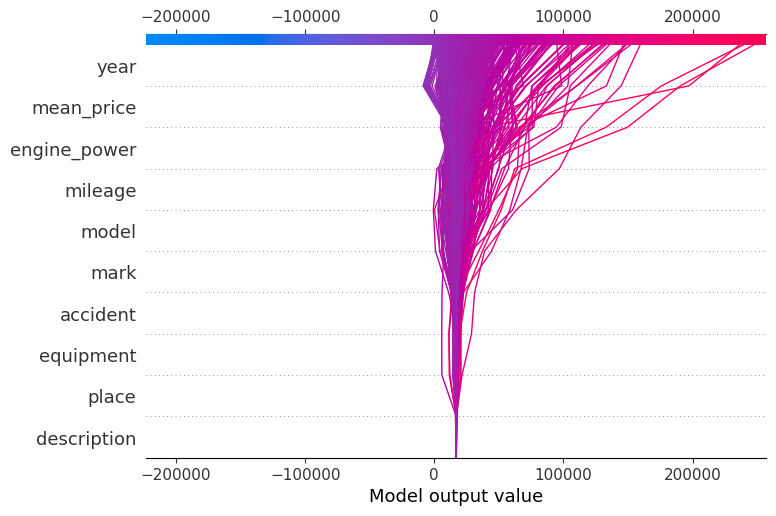

In [ ]:
shap.decision_plot(explainer.expected_value, shap_values, final_features)

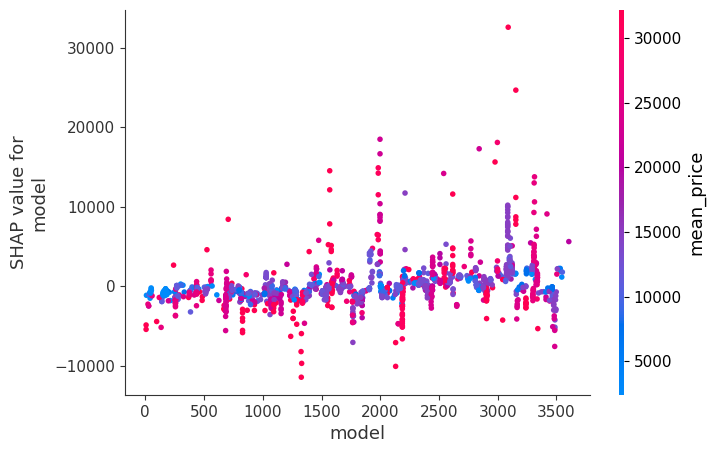

In [ ]:
shap.dependence_plot("model", shap_values, subsampled_data)

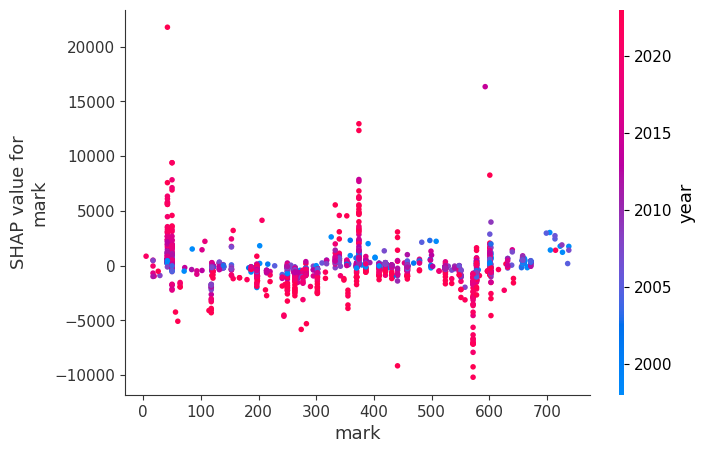

In [ ]:
shap.dependence_plot("mark", shap_values, subsampled_data)

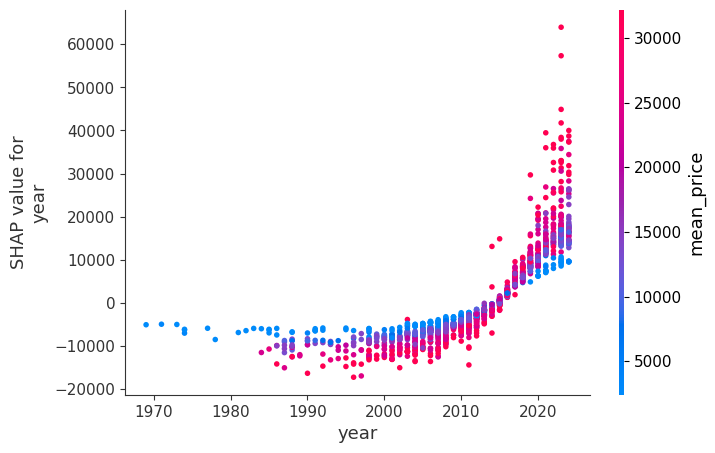

In [ ]:
shap.dependence_plot("year", shap_values, subsampled_data)

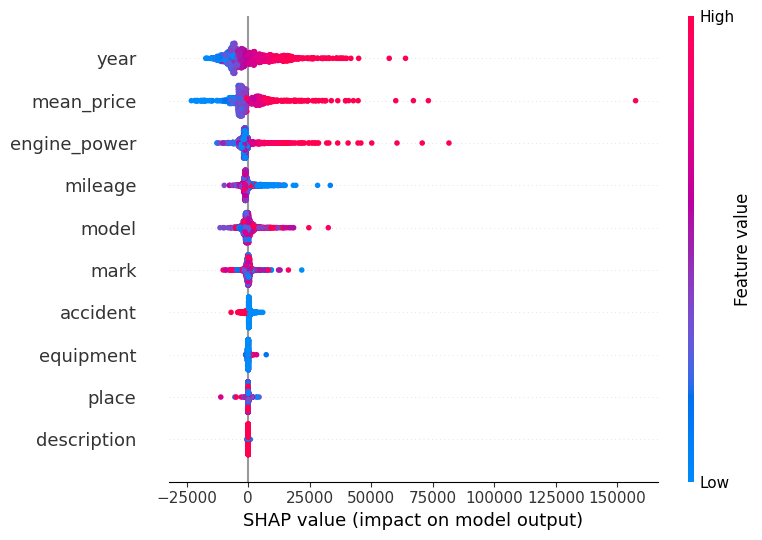

In [ ]:
shap.summary_plot(shap_values, subsampled_data)